In [101]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [103]:
def make_fset(x, drop=True):
    if len(set(x.split(' '))) < 2:
        print(f"WARNING: Features for '{x}-{x}' (self-self PPI) detected ...")
        if drop == False:
            x1 = x.split(' ')[0]
            fset = frozenset({x1,x1})
            return(fset)
        else:
            return(None)
    else:
        x1 = x.split(' ')[0]
        x2 = x.split(' ')[1]
        fset = frozenset({x1,x2})
        return(fset)

In [38]:
og = 'KOG0043'
ppi_file = '../ppi_ml/results/ppi_predict/feature_sweep/100/scored_interactions_fdr10_LinearSVC.csv'
annot_file = '../ppi_ml/annotations/leca_eunog_annots_complete.030721.csv'

In [34]:
annots = pd.read_csv(annot_file)
id_dict = dict()
for i in range(len(annots)):
    og = annots['ID'][i]
    gene = annots['human_gene_names_primary'][i]
    if type(gene) == str:
        id_dict[og] = gene
    else:
        id_dict[og] = og

{'ENOG502QPHT': 'ENOG502QPHT',
 'ENOG502QPHW': 'ENOG502QPHW',
 'ENOG502QPHZ': 'ENOG502QPHZ',
 'ENOG502QPIA': 'SCRN3, SCRN2',
 'ENOG502QPIC': 'ENOG502QPIC',
 'ENOG502QPIP': 'ENOG502QPIP',
 'ENOG502QPIQ': 'ENOG502QPIQ',
 'ENOG502QPJ0': 'ENOG502QPJ0',
 'ENOG502QPJ2': 'ENOG502QPJ2',
 'ENOG502QPJ7': 'ENOG502QPJ7',
 'ENOG502QPJC': 'ENOG502QPJC',
 'ENOG502QPJI': 'ENOG502QPJI',
 'ENOG502QPJV': 'MANEA, MANEAL',
 'ENOG502QPJZ': 'ENOG502QPJZ',
 'ENOG502QPKB': 'ENOG502QPKB',
 'ENOG502QPKF': 'ENOG502QPKF',
 'ENOG502QPKK': 'DNMT1',
 'ENOG502QPKQ': 'ENOG502QPKQ',
 'ENOG502QPKZ': 'ENOG502QPKZ',
 'ENOG502QPM4': 'CCDC146',
 'ENOG502QPMF': 'ENOG502QPMF',
 'ENOG502QPMK': 'PCDH11X, PCDH11Y, PCDH9',
 'ENOG502QPN1': 'ENOG502QPN1',
 'ENOG502QPNA': 'IFT46',
 'ENOG502QPNJ': 'ENOG502QPNJ',
 'ENOG502QPNY': 'DNASE1L1, DNASE1L3',
 'ENOG502QPP0': 'MVP',
 'ENOG502QPP4': 'EIF4E3',
 'ENOG502QPP7': 'ENOG502QPP7',
 'ENOG502QPPH': 'ENOG502QPPH',
 'ENOG502QPPT': 'ADCY10',
 'ENOG502QPPV': 'ENOG502QPPV',
 'ENOG502QPPW': 'ENO

In [96]:
annots_filt = annots[['ID', 'human_protein_names', 'human_function_cc', 'human_subcellular_location_cc']]
annots_filt = annots_filt.rename(columns={'ID':'ID1'})
annots_filt

,ID1,human_protein_names,human_function_cc,human_subcellular_location_cc
0,ENOG502QPHT,NaN,NaN,NaN
1,ENOG502QPHW,NaN,NaN,NaN
2,ENOG502QPHZ,NaN,NaN,NaN
3,ENOG502QPIA,"Secernin-3, Secernin-2",NaN,NaN
4,ENOG502QPIC,NaN,NaN,NaN
...,...,...,...,...
5983,KOG4845,NADH-ubiquinone oxidoreductase chain 4 (EC 7.1...,FUNCTION: Core subunit of the mitochondrial me...,SUBCELLULAR LOCATION: Mitochondrion inner memb...
5984,KOG4846,Nuclear receptor subfamily 1 group D member 1 ...,FUNCTION: Transcriptional repressor which coor...,SUBCELLULAR LOCATION: Nucleus {ECO:0000250|Uni...
5985,KOG4847,"IQCJ-SCHIP1 readthrough transcript protein, Sc...",FUNCTION: May play a role in action potential ...,"SUBCELLULAR LOCATION: Cell projection, axon {E..."
5986,KOG4849,Cleavage and polyadenylation specificity facto...,FUNCTION: Component of the cleavage factor Im ...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...


In [98]:
df = pd.read_csv(ppi_file)
df_filt = df[df['ID'].str.contains(og)].reset_index(drop=True)
df_filt[['ID1', 'ID2']] = df_filt['ID'].str.split(' ', expand=True)
df_filt['gene1'] = [id_dict[i] for i in df_filt['ID1']]
df_filt['gene2'] = [id_dict[i] for i in df_filt['ID2']]
df_filt = df_filt.merge(annots_filt, how='left', left_on='ID1', right_on='ID1')
df_filt

,ID,ppi_score,set,ID1,ID2,gene1,gene2,human_protein_names,human_function_cc,human_subcellular_location_cc
0,ENOG502QT04 KOG0043,0.821241,predict,ENOG502QT04,KOG0043,ENOG502QT04,"EFHC2, EFHC1",NaN,NaN,NaN
1,KOG4044 KOG0043,0.671658,predict,KOG4044,KOG0043,"ISOC2, ISOC1","EFHC2, EFHC1","Isochorismatase domain-containing protein 2, I...",NaN,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
2,KOG3961 KOG0043,0.607872,predict,KOG3961,KOG0043,"PACRGL, PACRG","EFHC2, EFHC1","PACRG-like protein, Parkin coregulated gene pr...","NA, FUNCTION: Suppresses cell death induced by...",NaN
3,KOG1695 KOG0043,0.592962,predict,KOG1695,KOG0043,"GSTA4, HPGDS, GSTA1, GSTA2, GSTP1, GSTM1, GSTM...","EFHC2, EFHC1",Glutathione S-transferase A4 (EC 2.5.1.18) (GS...,FUNCTION: Conjugation of reduced glutathione t...,"SUBCELLULAR LOCATION: Cytoplasm., SUBCELLULAR ..."
4,ENOG502QT8E KOG0043,0.565646,predict,ENOG502QT8E,KOG0043,ENKUR,"EFHC2, EFHC1",Enkurin,FUNCTION: Adapter that functions to localize a...,"SUBCELLULAR LOCATION: Cell projection, cilium,..."
5,ENOG502S497 KOG0043,0.533437,predict,ENOG502S497,KOG0043,ENOG502S497,"EFHC2, EFHC1",NaN,NaN,NaN
6,KOG4033 KOG0043,0.520467,predict,KOG4033,KOG0043,OSCP1,"EFHC2, EFHC1",Protein OSCP1 (hOSCP1) (Organic solute transpo...,FUNCTION: May be involved in drug clearance in...,SUBCELLULAR LOCATION: Basal cell membrane. Not...
7,KOG2368 KOG0043,0.520350,predict,KOG2368,KOG0043,"HMGCL, HMGCLL1","EFHC2, EFHC1","Hydroxymethylglutaryl-CoA lyase, mitochondrial...",FUNCTION: Mitochondrial 3-hydroxymethyl-3-meth...,SUBCELLULAR LOCATION: Mitochondrion matrix {EC...
8,KOG0145 KOG0043,0.500524,predict,KOG0145,KOG0043,"ELAVL4, ELAVL2, ELAVL3, ELAVL1","EFHC2, EFHC1",ELAV-like protein 4 (Hu-antigen D) (HuD) (Para...,FUNCTION: RNA-binding protein that is involved...,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000269|P...
9,ENOG502QSAN KOG0043,0.488137,predict,ENOG502QSAN,KOG0043,ENOG502QSAN,"EFHC2, EFHC1",NaN,NaN,NaN


In [89]:
hits = df_filt['ID1'].tolist()
hits = ['KOG0043'] + hits
hits

['KOG0043',
 'ENOG502QT04',
 'KOG4044',
 'KOG3961',
 'KOG1695',
 'ENOG502QT8E',
 'ENOG502S497',
 'KOG4033',
 'KOG2368',
 'KOG0145',
 'ENOG502QSAN',
 'KOG0074',
 'KOG2927',
 'KOG4070']

In [90]:
with open('../ppi_ml/results/cmplx_files/special_cases/efhc12.txt', 'w') as f:
    f.write('\n'.join(map(str, hits)))

In [99]:
df_filt.to_csv('../ppi_ml/results/cmplx_files/efhc12_ppis_annotated.csv')

In [109]:
all_ppis = [frozenset({i, j}) for i,j in list(combinations(hits, 2))]
df['fs'] = [make_fset(i, drop=True) for i in df['ID']]
ppi_nx = df[df['fs'].isin(all_ppis)].reset_index(drop=True)

In [110]:
ppi_nx

,ID,ppi_score,set,fs
0,KOG0074 KOG4044,0.890806,predict,"(KOG0074, KOG4044)"
1,ENOG502QT04 KOG0043,0.821241,predict,"(ENOG502QT04, KOG0043)"
2,KOG0074 KOG1695,0.749632,predict,"(KOG0074, KOG1695)"
3,KOG1695 KOG4044,0.732292,predict,"(KOG1695, KOG4044)"
4,KOG4044 KOG0145,0.691428,predict,"(KOG0145, KOG4044)"
5,KOG2368 KOG4044,0.675162,predict,"(KOG2368, KOG4044)"
6,KOG4044 KOG0043,0.671658,predict,"(KOG0043, KOG4044)"
7,KOG4033 KOG4044,0.629386,predict,"(KOG4033, KOG4044)"
8,ENOG502QSAN ENOG502QT04,0.615496,predict,"(ENOG502QT04, ENOG502QSAN)"
9,KOG3961 KOG0043,0.607872,predict,"(KOG0043, KOG3961)"


In [126]:
id_dict = dict()
for i in range(len(annots)):
    og = annots['ID'][i]
    gene = annots['human_gene_names_primary'][i]
    if type(gene) == str:
        n_genes = gene.split(', ')
        if len(n_genes) > 1:
            gene = ',\n'.join(n_genes[0:2]) + ' ...'
        id_dict[og] = gene
    else:
        id_dict[og] = og

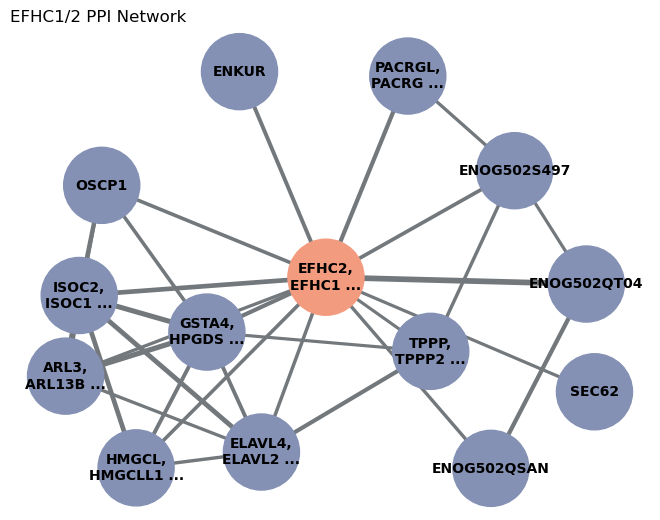

In [129]:
colors = ["#4DBBD5", "#E64B35", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#DC0000", "#7E6148", "#B09C85"]
protein_network = nx.Graph()
# add nodes with color attribute (discrete variable)
for i in hits:
    color = [colors[4] if i == 'KOG0043' else colors[5]][0]
    gene = id_dict[i] 
    protein_network.add_node(gene, color=color)

# add edges with thickness attribute (continuous variable)
for i in range(len(ppi_nx)):
    p1 =  list(ppi_nx['fs'][i])[0]
    gene1 = id_dict[p1]
    p2 =  list(ppi_nx['fs'][i])[1]
    gene2 = id_dict[p2]
    weight = ppi_nx['ppi_score'][i]
    protein_network.add_edge(gene1, gene2, thickness=weight*5)

# extract node colors and edge thickness attributes
node_colors = [protein_network.nodes[node]["color"] for node in protein_network.nodes()]
edge_thickness = [protein_network.edges[edge]["thickness"] for edge in protein_network.edges()]

# draw the network using NetworkX with custom attributes
#pos = nx.arf_layout(protein_network)
#pos = nx.circular_layout(protein_network)
pos = nx.kamada_kawai_layout(protein_network)
nx.draw(protein_network, pos, with_labels=True, node_size=3000, font_size=10, font_weight="bold", edge_color="#73787C", node_color=node_colors, width=edge_thickness)

# add title
plt.title('EFHC1/2 PPI Network', loc="left")

# save figure
plt.savefig(f"../ppi_ml/figures/efhc12_network.png", dpi=300)
plt.savefig(f"../ppi_ml/figures/efhc12_network.pdf", dpi=300)

# show the plot
plt.show()